# Imports and file loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import matplotlib.animation as animation
%matplotlib inline
import imageio
from scipy.ndimage.interpolation import rotate
from math import cos, sin
import time
import random
import string
import optical_imaging as oi
import copy
import oi_file
reload(oi)
reload(oi_file)
import os
pi=3.14159

In [2]:
file_directory_mp4 = '/home/preston/Desktop/Science/Research/cancer_cells/data/8-18-2016/oi_rp/vid/'
file_path_mp4 = file_directory_mp4 + 'HCT-116_pr0005_0000.mp4'

file_directory_bvi = '/home/preston/Desktop/Science/Research/cancer_cells/data/8-18-2016/oi_rp/bvi/'
file_path_bvi = file_directory_bvi + 'HCT-116_pr0005_0000.bvi'

In [3]:
vid = oi_file.open_video_connection(file_path_mp4)

# Define template image and stage

- 'first_cell_imaging':
    - c0: 210, 145
    - c1: 207, 129
    - c2: 298, 125
    - c3: 300, 140
    
- 7-4-2016
    - mix_0001
        - c0: 426, 233
        - c1: 426, 217
        - c2: 517, 217
        - c3: 517, 233
        
- 7-10-2016
    - HCT_0000
        - c0:
        - c1:
        - c2:
        - c3:

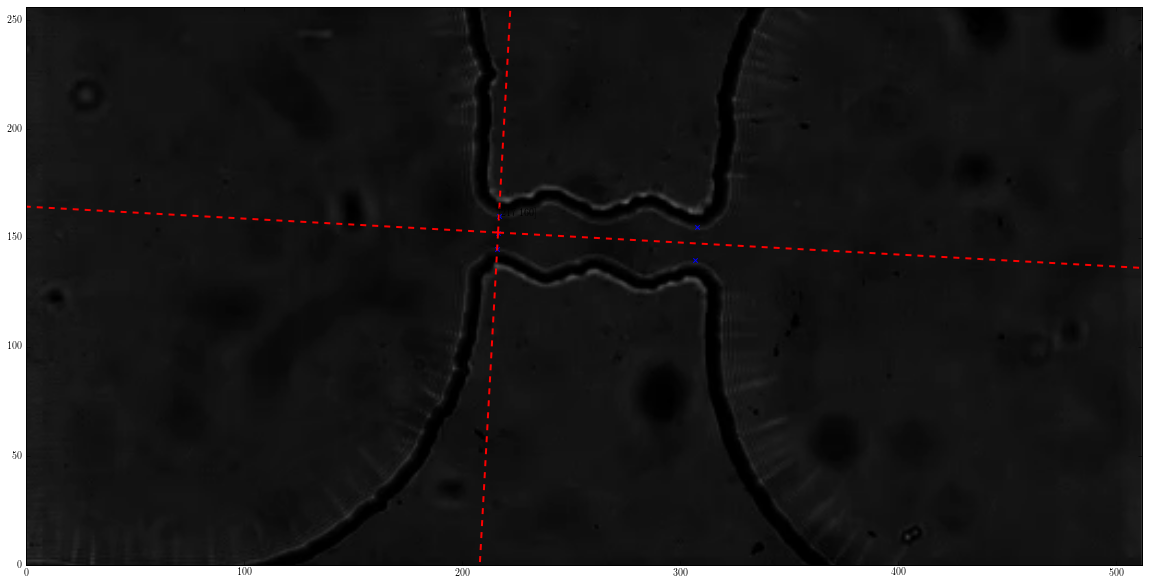

In [4]:
reload(oi)
template_frame = oi.get_frame_vid(vid, 0)
c0 = np.array([217, 160])
c1 = np.array([216, 145])
c2 = np.array([307, 140])
c3 = np.array([308, 155])
stage = oi.Stage(template_frame, c0, c1, c2, c3)
stage.plot_stage()

# Find events

In [6]:
reload(oi)
raw_events=oi.find_events_bvi(file_path_bvi, threshold_difference = .0225, cluster_threshold = 100)

tf:  100 / 16224 	active: 0 	inactive: 0
tf:  200 / 16224 	active: 0 	inactive: 0
tf:  300 / 16224 	active: 0 	inactive: 0
tf:  400 / 16224 	active: 0 	inactive: 0
tf:  500 / 16224 	active: 0 	inactive: 0
tf:  600 / 16224 	active: 0 	inactive: 0
tf:  700 / 16224 	active: 0 	inactive: 0


optical_imaging.py:54: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if pixels != None:


tf:  800 / 16224 	active: 1 	inactive: 0
tf:  900 / 16224 	active: 1 	inactive: 0
tf:  1000 / 16224 	active: 2 	inactive: 0
tf:  1100 / 16224 	active: 2 	inactive: 0
tf:  1200 / 16224 	active: 2 	inactive: 0
tf:  1300 / 16224 	active: 2 	inactive: 1
tf:  1400 / 16224 	active: 2 	inactive: 1
tf:  1500 / 16224 	active: 2 	inactive: 1
tf:  1600 / 16224 	active: 1 	inactive: 2
tf:  1700 / 16224 	active: 0 	inactive: 3
tf:  1800 / 16224 	active: 0 	inactive: 3
tf:  1900 / 16224 	active: 0 	inactive: 3
tf:  2000 / 16224 	active: 0 	inactive: 3
tf:  2100 / 16224 	active: 0 	inactive: 3
tf:  2200 / 16224 	active: 0 	inactive: 3
tf:  2300 / 16224 	active: 0 	inactive: 3
tf:  2400 / 16224 	active: 1 	inactive: 3
tf:  2500 / 16224 	active: 1 	inactive: 3
tf:  2600 / 16224 	active: 1 	inactive: 3
tf:  2700 / 16224 	active: 1 	inactive: 3
tf:  2800 / 16224 	active: 1 	inactive: 3
tf:  2900 / 16224 	active: 0 	inactive: 4
tf:  3000 / 16224 	active: 0 	inactive: 4
tf:  3100 / 16224 	active: 0 	inacti

##### Save events

In [15]:
reload(oi_file)

<module 'oi_file' from 'oi_file.py'>

In [16]:
oi_file.save_oi_events_json('/home/preston/Desktop/Science/Research/cancer_cells/data/8-18-2016/oi_rp/events/\
hct-116_pr0005_0000_oi_events_raw_json',\
                       raw_events)

In [64]:
events = copy.deepcopy(raw_events)

##### Load events

In [23]:
reload(oi_file)

<module 'oi_file' from 'oi_file.py'>

In [24]:
events = oi_file.load_oi_events_json('/home/preston/Desktop/Science/Research/cancer_cells/data/8-18-2016/oi_rp/events/\
hct-116_pr0005_0000_oi_events_raw_json')

### Event post-processing

##### Connect loose

In [16]:
print len(events)
events = oi.connect_loose_events(copy.deepcopy(events), tf_sep_threshold = 10, dist_threshold = 50)
print len(events)

78
52


##### Remove events that don't enter, exit channel

In [65]:
for i, event in enumerate(events):
    event.get_channel_enter_exit_tf(stage)
    
print len(events)
events = [event for event in events if (event._channel_enter_tf != None) and (event._channel_exit_tf != None)]
print len(events)

78
21


# Create trajectory plot

131072
(256, 512)


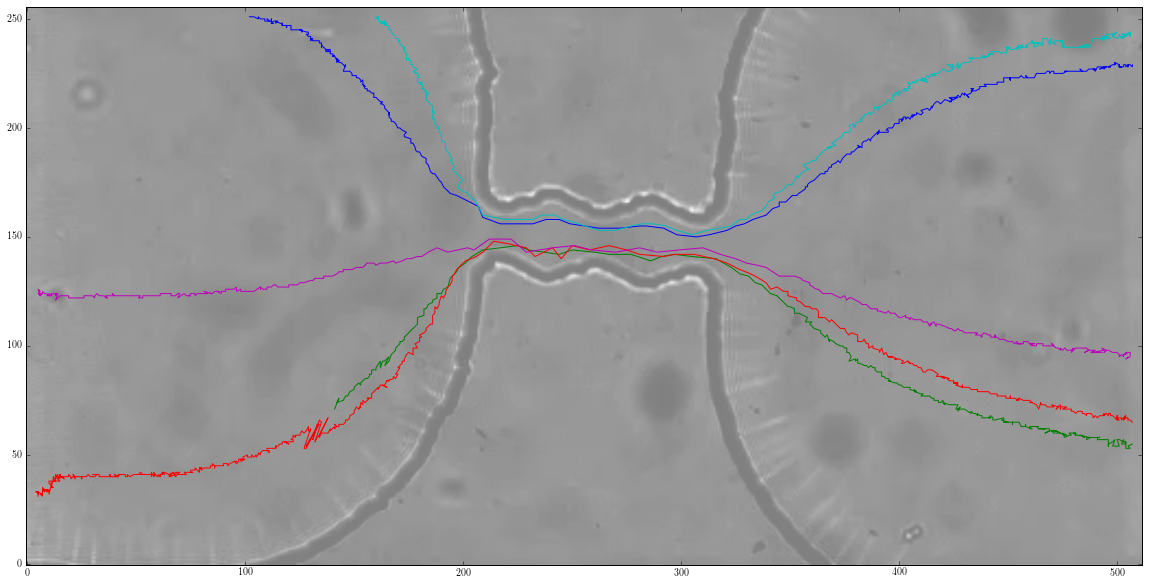

In [37]:
fig = plt.figure(figsize = (20,12))


#gs = gs.GridSpec(2, 2)

for i, event in enumerate(events[:5]):
    px = []
    py = []
    for detection in event._detections:
        px.append(detection._px)
        py.append(detection._py)
    plt.plot(px, py)

plt.imshow(oi_file.get_frame_bvi(file_path_bvi, 0, 256, 512), alpha=0.5, cmap = 'gray', origin = 'lower')

plt.show()

In [66]:
file_directory_bvi = '/home/preston/Desktop/Science/Research/cancer_cells/data/8-18-2016/oi_rp/bvi/'
file_directory_gallery = file_directory_bvi.split('bvi')[0] + 'events/oi_gallery/'
if not os.path.exists(file_directory_gallery):
    os.makedirs(file_directory_gallery)
    
gallery_base_name = '/home/preston/Desktop/Science/Research/cancer_cells/data/8-18-2016/oi_rp/bvi/HCT-116_pr0005_0000.bvi'
gallery_base_name = gallery_base_name.split('bvi')[-2].replace('/', '').replace('.','')+'_'

In [67]:
def create_event_gallery(event_num):
    px_list = []
    py_list = []
    
    directory = file_directory_bvi.split('/')[0]+'/'
    
    for i, det in enumerate(events[event_num]._detections):
        px_list.append(det._px)
        py_list.append(det._py)
        fig = plt.figure(figsize = ((12,6)))
        plt.imshow(oi_file.get_frame_bvi(file_path_bvi, det._tf, 256, 512), alpha=0.5, cmap = 'gray', origin = 'lower')
        
        plt.plot(px_list, py_list)
        
        plt.savefig(file_directory_gallery + gallery_base_name + str(event_num) + '-' + str(i) + '.png' )

131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(256, 512)
131072
(25

KeyboardInterrupt: 

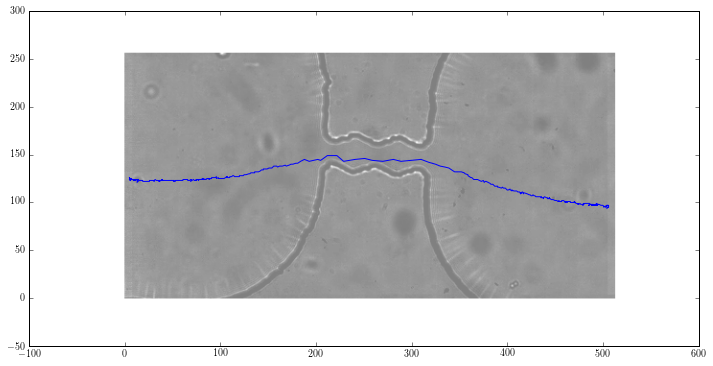

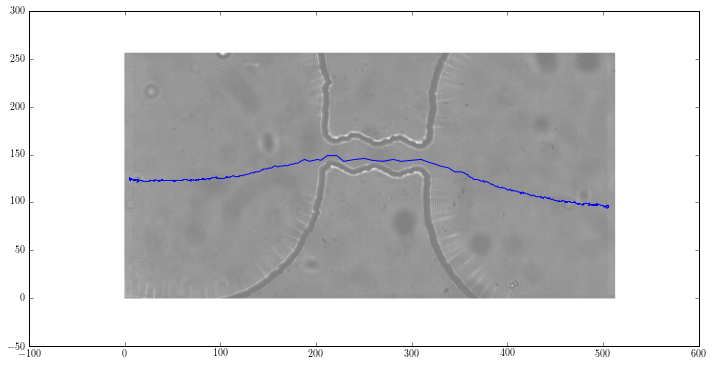

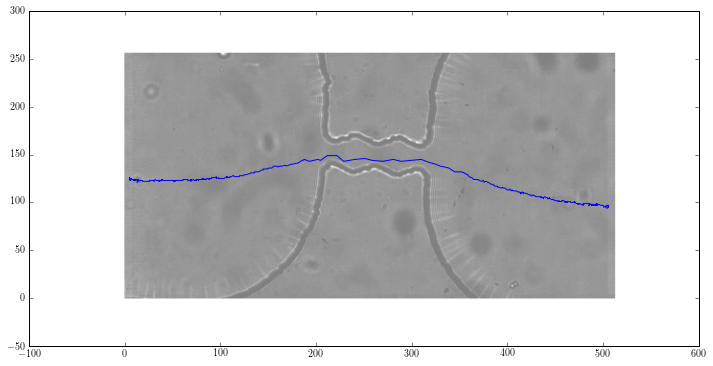

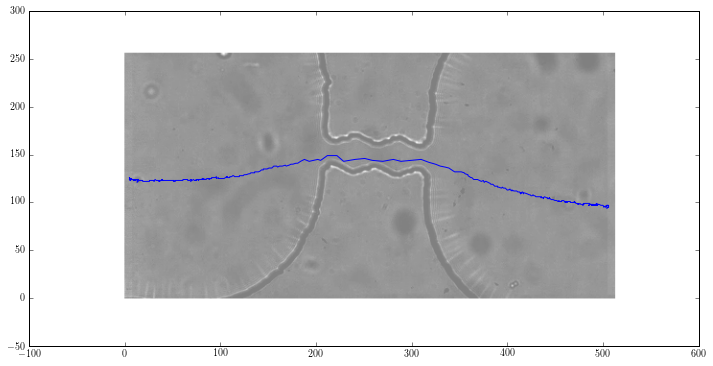

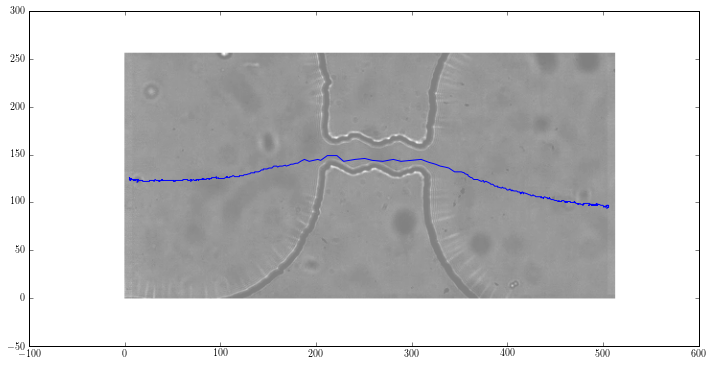

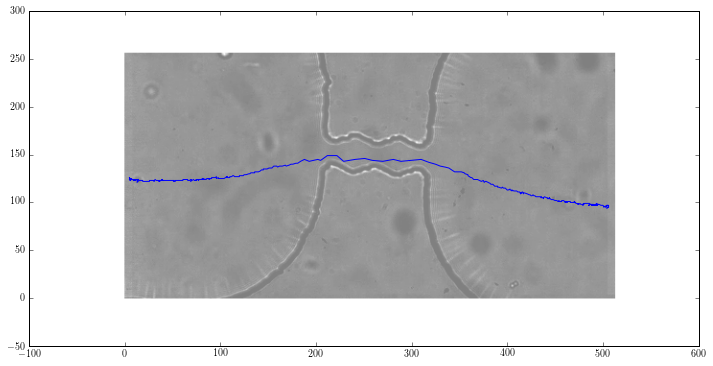

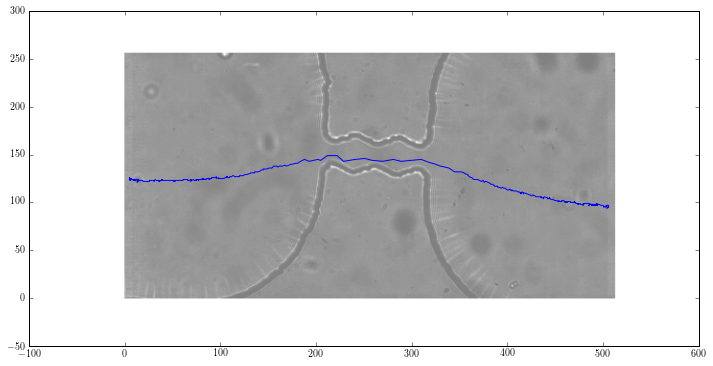

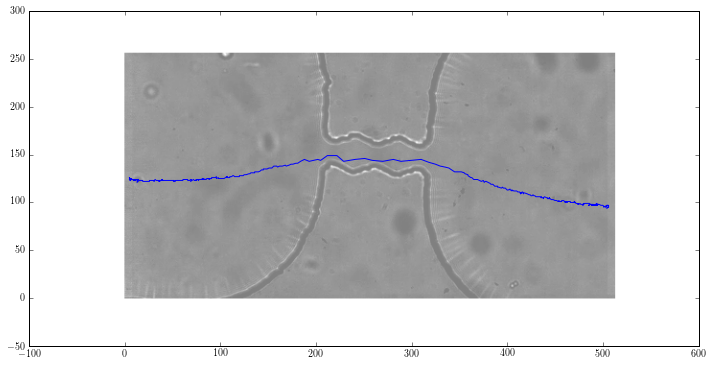

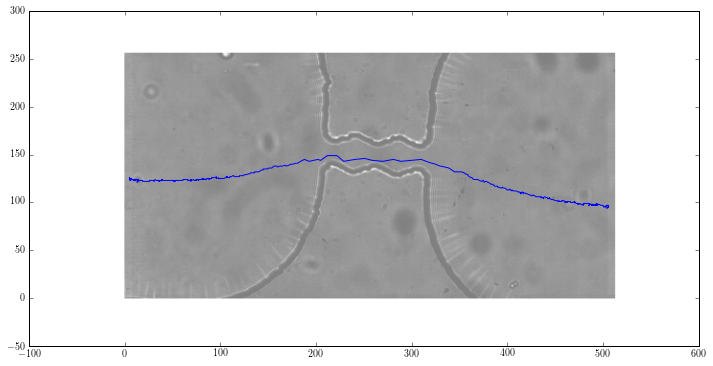

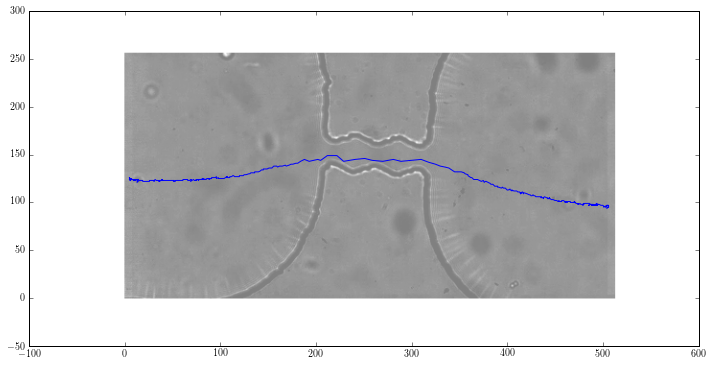

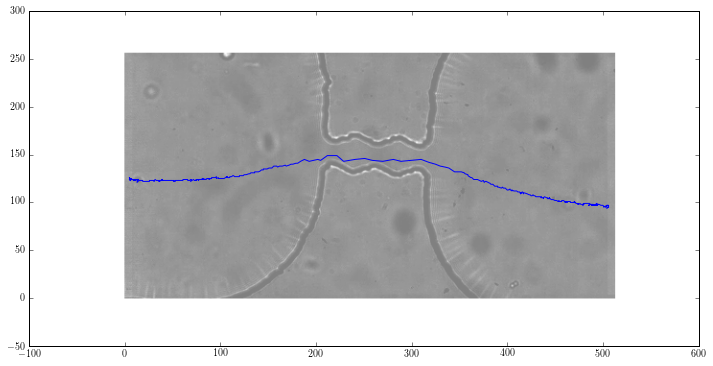

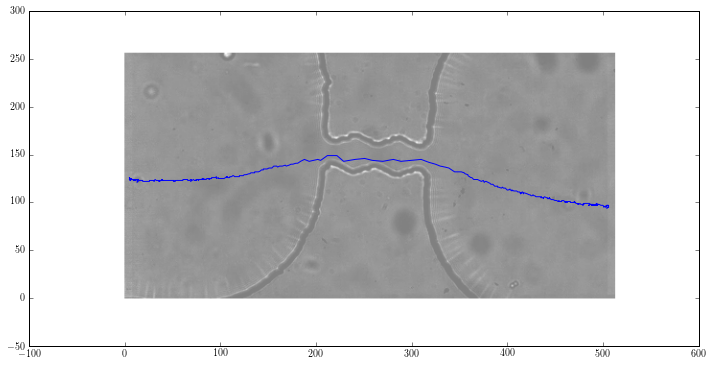

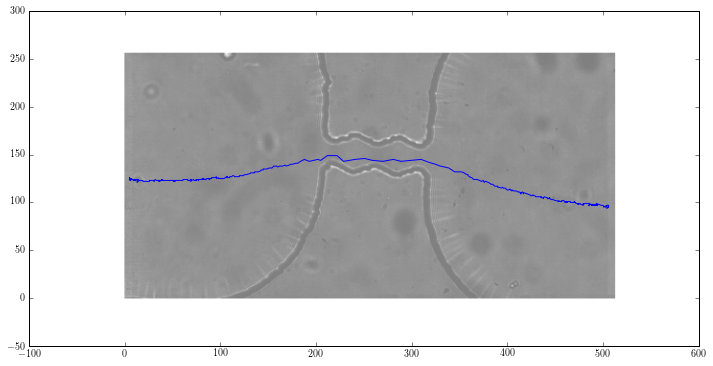

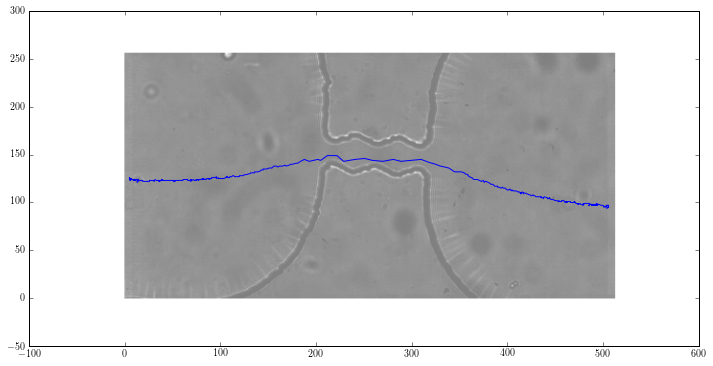

In [ ]:
create_event_gallery(0)